# Routes -- Seine Maritime

## Partie 1 - Chargement et nettoyage

Import des librairies

In [2]:
import pandas as pd
import numpy as np
import csv

Chargement du csv

In [9]:
df = pd.read_table('data/routesTravaux.csv', index_col = 0, sep = ";", decimal = ",")
df = df.reset_index()
df.head()

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
0,000efbb3-e7c1-4b9c-a54e-1e0d6d81988a,76 D0131,20,0,7,7,0,490,3,200,490,3205,2715,1.5,2012,ES-BC,COUL
1,0011b2a4-5a64-4223-a856-6c9e8b6b2b48,76 D0293,20,0,7,7,6,724,6,940,6737,6953,216,1.0,2002,COUL,ES
2,0011d99f-9091-4be4-a16c-354f23b24004,76 D0003,20,0,7,7,51,708,51,810,50762,50864,102,1.0,1991,ES,AC
3,00155332-804f-4547-8537-0897d7e479e1,76 D0915,20,0,11,9,61,800,62,711,61177,62116,939,2.0,2000,BBUM,COUL
4,0016e2d9-78bb-4092-b846-90452703009a,76 D0022,20,0,7,7,86,26,86,650,86141,86765,624,1.0,2006,COUL,BB


In [10]:
df.dtypes

entityid                     object
route                        object
rub                           int64
age                           int64
mois                          int64
annee                         int64
prd                           int64
abd                           int64
prf                           int64
abf                           int64
cumuld                        int64
cumulf                        int64
long                          int64
epaisseurdernierstravaux    float64
anneedernierstravaux          int64
naturedernierstravaux        object
supportdernierstravaux       object
dtype: object

Le type epaisseurdernierstravaux est bien float64

In [12]:
df.isnull().sum()

entityid                    0
route                       0
rub                         0
age                         0
mois                        0
annee                       0
prd                         0
abd                         0
prf                         0
abf                         0
cumuld                      0
cumulf                      0
long                        0
epaisseurdernierstravaux    0
anneedernierstravaux        0
naturedernierstravaux       0
supportdernierstravaux      6
dtype: int64

La colonne supportdernierstravaux contient 6 NaN. On essaie de les trouver :

In [13]:
df = df.fillna(method='ffill')

In [30]:
df.describe(include = 'all')

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
count,5492,5492,5492.0,5492.0,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492,5492
unique,5492,538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,31
top,e8c0c076-bceb-42a5-8b3e-68adac49bd44,76 D0925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,ES
freq,1,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1195,1373
mean,NaN,NaN,20.0,0.0,7.442098,8.410233,17.911143,471.999818,19.052986,526.152221,17854.609068,19047.932993,1193.323926,106.477810,2002.685907,NaN,NaN
std,NaN,NaN,0.0,0.0,2.247506,2.273855,21.058117,418.826419,21.135804,423.672007,20606.118584,20659.906627,1326.384627,1013.277896,11.412237,NaN,NaN
min,NaN,NaN,20.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,NaN,NaN
25%,NaN,NaN,20.0,0.0,7.000000,7.000000,3.000000,154.000000,4.000000,235.000000,3355.000000,4550.000000,259.750000,1.000000,2000.000000,NaN,NaN
50%,NaN,NaN,20.0,0.0,7.000000,7.000000,11.000000,443.000000,12.000000,500.000000,10963.500000,12203.500000,724.000000,2.000000,2004.000000,NaN,NaN
75%,NaN,NaN,20.0,0.0,9.000000,9.000000,25.000000,730.000000,26.000000,760.000000,24485.500000,25850.250000,1679.250000,4.000000,2007.000000,NaN,NaN


Remarques :
   * La colonne age est toujours nulle.
   * Des valeurs 9999,99 sont répétées dans le data set pour la colonne epaisseurdernierstravaux et sont très éloignées des autres valeurs (autour de 4). Ces valeurs peuvent témoigner d'une absence de valeur (à voir avec l'expert métier)

In [25]:
df.loc[df['epaisseurdernierstravaux'] == 9999.99]

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
27,01462ade-7c8e-4562-b9c7-52f65154f2b6,76 D0049,20,0,7,7,19,1191,20,20,20255,20506,251,9999.99,1995,CP96,!!!!!!
47,0227d381-1021-44d0-b034-7334c0c2063c,76 D0312B,20,0,10,12,0,300,0,509,300,509,209,9999.99,1997,!!!!!!,AC
49,02375d2a-e95c-4259-9420-85d142507b3d,76 E6015C2,20,0,7,7,0,0,0,367,0,367,367,9999.99,1900,!!!!!!,BB
174,075ca46e-a18b-465a-8f3d-490be887a699,76 E6382B3,20,0,7,7,0,0,0,153,0,153,153,9999.99,1900,!!!!!!,BB
331,0e9cbfcb-68d6-421a-9705-6c6d5e8f20d8,76 D0009A,20,0,7,7,1,0,1,309,432,741,309,9999.99,1900,!!!!!!,AC
339,0ef6130e-e27c-4488-885a-123dca6750b1,76 E6382A3,20,0,7,7,0,0,0,250,0,250,250,9999.99,1900,!!!!!!,BB
362,0fbefdc3-dc22-4b1d-8fa0-b8f1f56a8222,76 E0489B2,20,0,7,7,0,0,0,270,0,270,270,9999.99,1900,!!!!!!,BB
391,10d7f706-2850-49ec-adc5-7abf4d826aeb,76 D0111,20,0,7,7,7,602,8,224,7852,8579,727,9999.99,1900,!!!!!!,AC
403,114ef989-c02b-493e-ae74-481460f00eec,76 E0489A4,20,0,7,7,0,0,0,570,0,570,570,9999.99,1900,!!!!!!,BB
588,1b062660-d773-4af6-a466-0daffb6ec869,76 D0034,20,0,7,7,13,9,16,910,12977,16888,3911,9999.99,1997,BB,ES


On voit que très souvent, une valeur de 9999.99 pour epaisseurdernierstravaux est associée avec des valeurs anormales ('!!!!!!') pour les colonnes naturedernierstravaux ou supportdernierstravaux. On supprime donc ces lignes. 

In [33]:
df = df[df.epaisseurdernierstravaux != 9999.99]
df = df[df.naturedernierstravaux != '!!!!!!']
df = df[df.supportdernierstravaux != '!!!!!!']

## Partie 2 Analyse

In [63]:
import matplotlib.pyplot as plt

In [95]:
grouped = df['naturedernierstravaux'].groupby(df['naturedernierstravaux'])

In [103]:
counted = grouped.count()

counted.sort_values(ascending = False, inplace = True) #Ordonne la série

top5 = counted[:6]
print(top5)

naturedernierstravaux
BB      1185
COUL     992
ES       863
BBUM     346
BBTM     339
BBSG     315
Name: naturedernierstravaux, dtype: int64


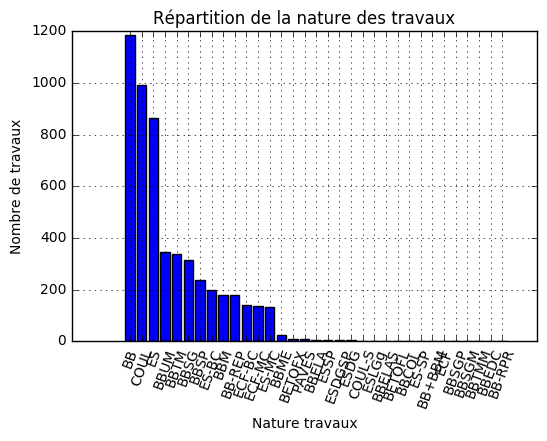

In [138]:
plt.xlabel('Nature travaux')
plt.ylabel('Nombre de travaux')
plt.title('Répartition de la nature des travaux')

plt.bar(range(len(counted)), counted, align='center')
plt.xticks(range(len(counted)), counted.index, rotation=70)

plt.grid(True)
plt.show()

In [141]:
groupedYear =  df.groupby(df['annee'])

groupedEpaisseurAnnee = df['epaisseurdernierstravaux'].groupby(df['annee']).mean()
groupedEpaisseurAnnee.sort_values(ascending = False, inplace = True)

print(groupedEpaisseurAnnee)

       entityid  route   rub   age  mois   prd   abd   prf   abf  cumuld  \
annee                                                                      
1             1      1     1     1     1     1     1     1     1       1   
4             1      1     1     1     1     1     1     1     1       1   
5             2      2     2     2     2     2     2     2     2       2   
7          3276   3276  3276  3276  3276  3276  3276  3276  3276    3276   
8           509    509   509   509   509   509   509   509   509     509   
9           237    237   237   237   237   237   237   237   237     237   
10          104    104   104   104   104   104   104   104   104     104   
11          442    442   442   442   442   442   442   442   442     442   
12          260    260   260   260   260   260   260   260   260     260   
13          267    267   267   267   267   267   267   267   267     267   
14          226    226   226   226   226   226   226   226   226     226   
50          